**Manolito Jr. B. Aquino <br>
CPE 313-CPE32S8 - Advanced Machine Learning and Deep Learning <br>
Engr. Roman Richard <br>**

# Introduction & Instruction

As an introduction to computer vision, you are to perform the simple task of mood detection. Mood detection is the process of identifying and understanding a person's current emotional state. It can be done through a variety of methods, but we will focus on Facial expression recognition. Facial expressions are one of the most important cues for understanding human emotions. Mood detection systems can use computer vision techniques to analyze facial features and identify specific expressions, such as happiness, sadness, anger, you must attain the following objectives:

Recognize when a face is yours or not.
Recognize only your mood (happy, sad, angry, or confused).
Perform testing to show the performance of your implementation.
Submission Requirements:


# Importing Necessary Libraries

In [43]:
import cv2
import os
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

# Preprocessing images taken

Before starting the coding part, I first took a picture of myself. These pictures have three categories which are sad, happy, and neutral. With these images, I tried getting the regions of interests using CascadeClassifier method from OpenCV. Then, I decided to save it in a folder named images_conv

In [44]:
# Transform the current images to only the regions of interst
folders = os.listdir('images')
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
for folder in folders:
    savepath = os.path.join('images_conv', folder)
    path = os.path.join('images', folder)
    files = os.listdir(path)
    for file in files:
        print(file)
        img = cv2.imread(os.path.join(path, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = cascade.detectMultiScale(gray, 1.3, 3)

        for (x, y, w, h) in faces:
            roi = img[y:y+h, x:x+w]
            roi = cv2.resize(roi, (224, 224))
            cv2.imwrite(os.path.join(savepath, file), roi)


WIN_20240322_15_45_41_Pro.jpg
WIN_20240322_15_45_42_Pro (2).jpg
WIN_20240322_15_45_42_Pro (3).jpg
WIN_20240322_15_45_42_Pro.jpg
WIN_20240322_15_45_43_Pro (2).jpg
WIN_20240322_15_45_43_Pro (3).jpg
WIN_20240322_15_45_43_Pro (4).jpg
WIN_20240322_15_45_43_Pro.jpg
WIN_20240322_15_45_44_Pro (2).jpg
WIN_20240322_15_45_44_Pro (3).jpg
WIN_20240322_15_45_44_Pro (4).jpg
WIN_20240322_15_45_44_Pro.jpg
WIN_20240322_15_45_45_Pro (2).jpg
WIN_20240322_15_45_45_Pro (3).jpg
WIN_20240322_15_45_45_Pro (4).jpg
WIN_20240322_15_45_45_Pro (5).jpg
WIN_20240322_15_45_45_Pro.jpg
WIN_20240322_15_45_46_Pro (2).jpg
WIN_20240322_15_45_46_Pro (3).jpg
WIN_20240322_15_45_46_Pro (4).jpg
WIN_20240322_15_45_46_Pro.jpg
WIN_20240322_15_45_47_Pro (2).jpg
WIN_20240322_15_45_47_Pro (3).jpg
WIN_20240322_15_45_47_Pro (4).jpg
WIN_20240322_15_45_47_Pro.jpg
WIN_20240322_15_45_48_Pro (2).jpg
WIN_20240322_15_45_48_Pro (3).jpg
WIN_20240322_15_45_48_Pro (4).jpg
WIN_20240322_15_45_48_Pro (5).jpg
WIN_20240322_15_45_48_Pro.jpg
WIN_20240322

After successfully getting my faces' regions of interests and double-checking manually for inconsistencies. I've split my images into train and test sets that we will use for our deep learning model.

In [45]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define paths
source_dir = 'images_conv'
train_dir = 'train'
val_dir = 'test'

# Create train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split data into train and validation sets
for label in os.listdir(source_dir):
    label_dir = os.path.join(source_dir, label)
    train_label_dir = os.path.join(train_dir, label)
    val_label_dir = os.path.join(val_dir, label)

    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(val_label_dir, exist_ok=True)

    images = os.listdir(label_dir)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    for image in train_images:
        shutil.copy(os.path.join(label_dir, image), os.path.join(train_label_dir, image))

    for image in val_images:
        shutil.copy(os.path.join(label_dir, image), os.path.join(val_label_dir, image))

I then used ImageDataGenerator from keras.preprocessing.images in order to get the features of my images

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

validation_generator = train_datagen.flow_from_directory(
    'test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 134 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


# Model Creation

With the help of the model architectures I've created for the past activities, I managed to come up with a model which had a total parameter of 11 million. Although this seems high, I found it okay to use since my datasets are quite limited.

In [47]:


# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust dimensions based on your image size and channels
num_classes = 3  # Number of classes in your dataset

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 128)     

I used adam as optimizer and since it is a categorical model, I used categorical_crossentropy

In [48]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
# Declare callback to store the model
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

I then trained the model with the datasets I've prepared earlier. I decided to save the model with best validation accuracy in case I'll need it in the future.

In [52]:
# Train the model
model.fit(train_generator, validation_data= validation_generator, epochs = 15, callbacks= [checkpoint])

Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.7761
Epoch 1: val_accuracy improved from 0.70455 to 0.77273, saving model to model.h5
5/5 [==============================] - 5s 1s/step - loss: 0.6169 - accuracy: 0.7761 - val_loss: 0.6147 - val_accuracy: 0.7727
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 0.5176 - accuracy: 0.8284
Epoch 2: val_accuracy did not improve from 0.77273
5/5 [==============================] - 5s 943ms/step - loss: 0.5176 - accuracy: 0.8284 - val_loss: 0.6727 - val_accuracy: 0.7727
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 0.4896 - accuracy: 0.8134
Epoch 3: val_accuracy did not improve from 0.77273
5/5 [==============================] - 4s 818ms/step - loss: 0.4896 - accuracy: 0.8134 - val_loss: 0.7728 - val_accuracy: 0.5455
Epoch 4/15
5/5 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.7463
Epoch 4: val_accuracy improved from 0.77273 to 0.81818, saving mo

# Computer Vision Code

With my past experience in computer vision activities. I managed to come up with a live feed classification of mood.

In [51]:
# Declare the y equivalent of the values for the prediction
labels = ['happy', 'neutral', 'sad']

# Prepare the CascadeClassifier Object
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the camera we'll be using
camera = cv2.VideoCapture(1)

while True:
    ret, frame = camera.read()
    if not ret:
        break
    # Convert the frame to grayscale for the cascadeclassifier to successfully identify the regions of interest
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray, 1.3, 3)
    for (x, y, w, h) in faces:
        # Preprocess the region of interest for it to be able to be predicted by the model
        roi = frame[y:y+h, x:x+w]
        roi = cv2.resize(roi, (224, 224))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        roi = cv2.resize(roi, (224, 224))
        roi = np.expand_dims(roi, axis=0)
        predictions = model.predict(roi)
        label = np.argmax(predictions)

        # Put the text in the frame to be able to see the prediction real time
        cv2.putText(frame, labels[label], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
camera.release()
cv2.destroyAllWindows()

# **Results**

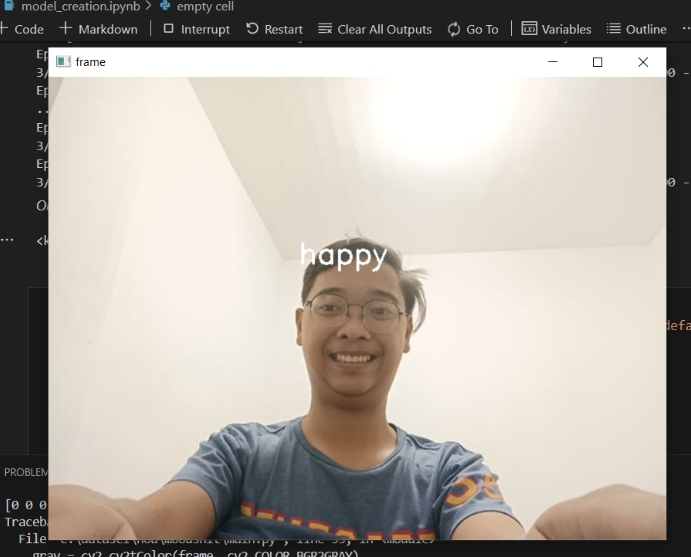

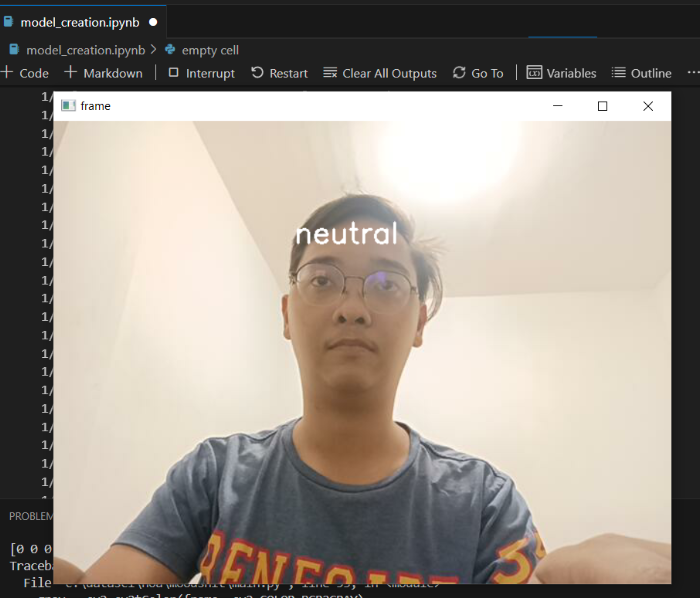

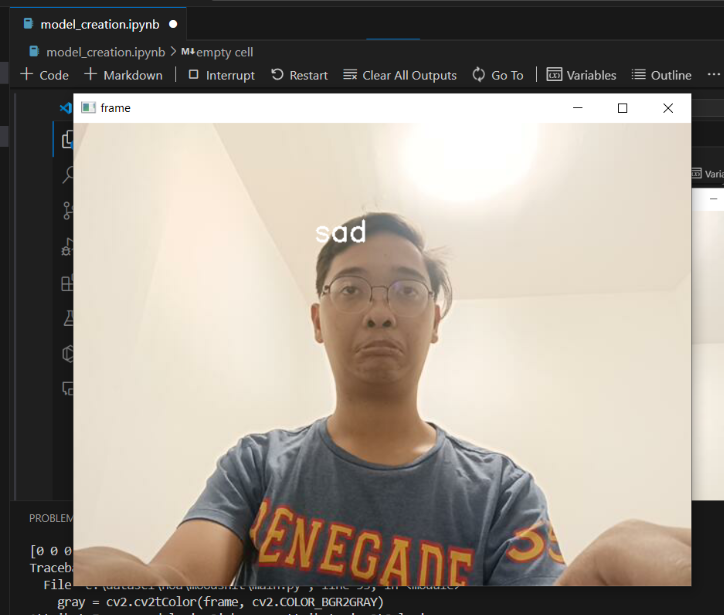

# Conclusion

In this activity, it enhanced my will for an improved understanding and skills for data science. At first, I was not happy on how the CascadeClassifier is working on my face. It randomly detects things except my face which is very frustrating. So I decided to look for alternatives such as DeepFace and MTCNN for face detection and face recognition. This worked, but it made the live face detection so laggy which frustrates me even more. So I decided to go back to CascadeClassifier and tweak its parameters and using my phone as the live feed camera as well. This lead to better result. With this, I managed to finish activity satisfyingly. I look forward to more activities as engaging as this. This was fun